# Chapter 8 - Ex5
# Use Marketing_Customer_Value_Analysis.csv data to build SVM classifier model to predict Response ['No', 'Yes']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
customer = pd.read_csv('Data/Marketing_Customer_Value_Analysis.csv')
customer

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer['Response'].value_counts()

Response
No     7826
Yes    1308
Name: count, dtype: int64

## <span style='color:yellow'> Build SVM Classifier model

In [32]:
x = customer.drop(['Response', 'Effective To Date', 'Customer'], axis = 1)
y = customer['Response']

categ_feats = x.select_dtypes(include = 'object').columns.to_list()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [35]:
#Build SVM_Classifier with Pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

svmC_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), categ_feats), remainder = 'passthrough', force_int_remainder_cols=False)),
    ('SMOTE_oversample', SMOTE(random_state = 1)),
    ('SVM_Classifier', SVC(kernel = 'rbf', C = 100, probability= True))
])

svmC_pipe.fit(x_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['State', 'Coverage',
                                                   'Education',
                                                   'EmploymentStatus', 'Gender',
                                                   'Location Code',
                                                   'Marital Status',
                                                   'Policy Type', 'Policy',
                                                   'Renew Offer Type',
                                                   'Sales Channel',
                                                   'Vehicle Class',
                                                   'Vehicle Size'])])),
                ('SMOTE_oversample', SMOTE(random_state=1)),
                ('SVM_Classifier', SVC(C=100, probability=True))])

Accuracy on train set: 0.5889253871421868
Accuracy on test  set: 0.5848230572783656


Confusion matrix:
        No  Yes
No   1385  974
Yes   164  218


Classification report:
               precision    recall  f1-score   support

          No       0.89      0.59      0.71      2359
         Yes       0.18      0.57      0.28       382

    accuracy                           0.58      2741
   macro avg       0.54      0.58      0.49      2741
weighted avg       0.80      0.58      0.65      2741



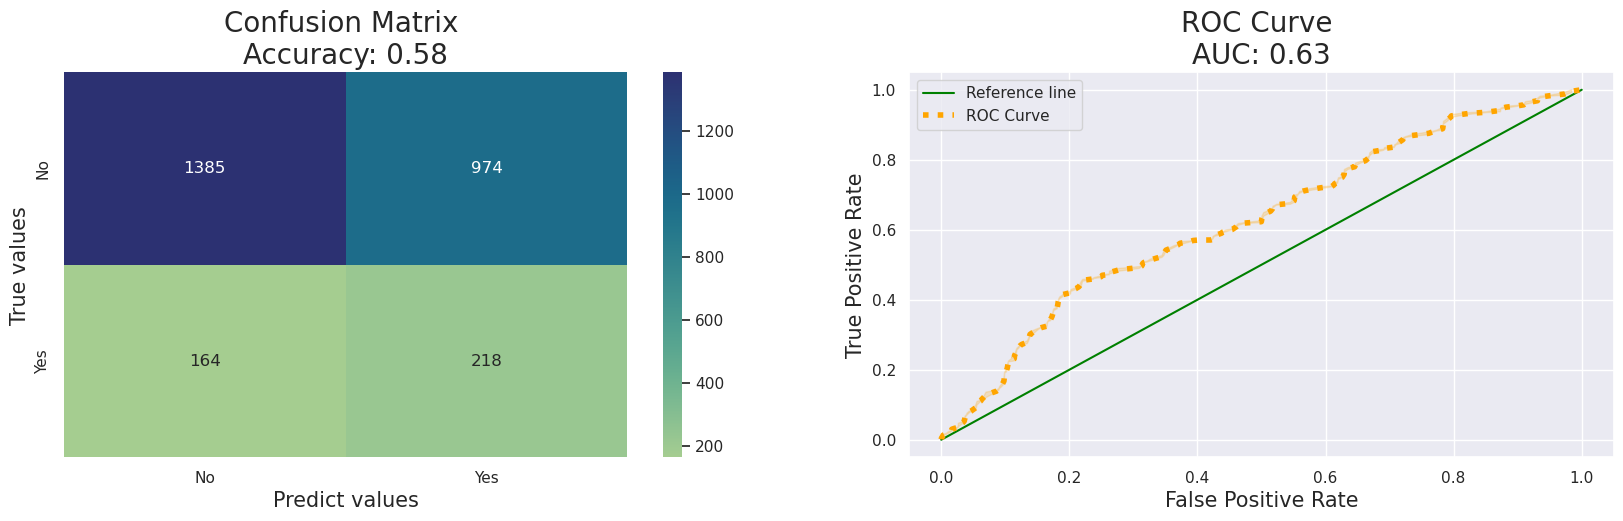

In [36]:
y_test_pred = svmC_pipe.predict(x_test)
y_test_proba = svmC_pipe.predict_proba(x_test)

print(f'Accuracy on train set: {svmC_pipe.score(x_train, y_train)}')
print(f'Accuracy on test  set: {svmC_pipe.score(x_test, y_test)}')
print()

labels = ['No', 'Yes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {svmC_pipe.score(x_test, y_test):.2f}', size=20)



#ROC and AUC are only for binary classification
#For multiclass, must be "one and the rest"

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='Yes')

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()

## <span style='color:yellow'> Accuracy is too low, as well the ROC Curve
## <span style='color:yellow'> Lest select the best features only

In [44]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

x = pd.get_dummies(customer.drop(['Response', 'Effective To Date', 'Customer'], axis = 1), drop_first=True).astype(int)
y = customer['Response']

# Apply SelectKBest class to extract all best features
k_best = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(x, y)

#Create a dataframe Feature_name : Score
df_k_best_score = pd.DataFrame({
    'Feature_name':x.columns,
    'Score':k_best.scores_
})

#Sort in descending order
df_k_best_score.sort_values('Score', ascending=False)

,Feature_name,Score
0,Customer Lifetime Value,0.308745
1,Income,0.265814
7,Total Claim Amount,0.152369
20,EmploymentStatus_Retired,0.034558
2,Monthly Premium Auto,0.033191
4,Months Since Policy Inception,0.022977
39,Renew Offer Type_Offer4,0.018688
37,Renew Offer Type_Offer2,0.018462
38,Renew Offer Type_Offer3,0.016356
42,Sales Channel_Web,0.008138


## Choose ['Customer Lifetime Value', 'Income', 'Total Claim Amount', 'Monthly Premium Auto', 'EmploymentStatus', 'Months Since Policy Inception', 'Renew Offer Type']
## to build new SVM_classifier models

In [15]:
x = customer[['Customer Lifetime Value', 'Income', 'Total Claim Amount', 'Monthly Premium Auto', 'EmploymentStatus', 'Months Since Policy Inception', 'Renew Offer Type']]
y = customer['Response']

categ_feats = x.select_dtypes(include = 'object').columns.to_list()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

svmC_pipe_new = Pipeline([
    ('OneHotEncoder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), categ_feats), remainder = 'passthrough', force_int_remainder_cols=False)),
    ('SMOTE_oversample', SMOTE(random_state = 1)),
    ('SVM_Classifier', SVC(kernel = 'rbf', C = 100, probability= True))
])

svmC_pipe_new.fit(x_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['EmploymentStatus',
                                                   'Renew Offer Type'])])),
                ('SMOTE_oversample', SMOTE(random_state=1)),
                ('SVM_Classifier', SVC(C=100, probability=True))])

Accuracy on train set: 0.5886125449710621
Accuracy on test  set: 0.5826340751550529


Confusion matrix:
        No  Yes
No   1379  980
Yes   164  218


Classification report:
               precision    recall  f1-score   support

          No       0.89      0.58      0.71      2359
         Yes       0.18      0.57      0.28       382

    accuracy                           0.58      2741
   macro avg       0.54      0.58      0.49      2741
weighted avg       0.79      0.58      0.65      2741



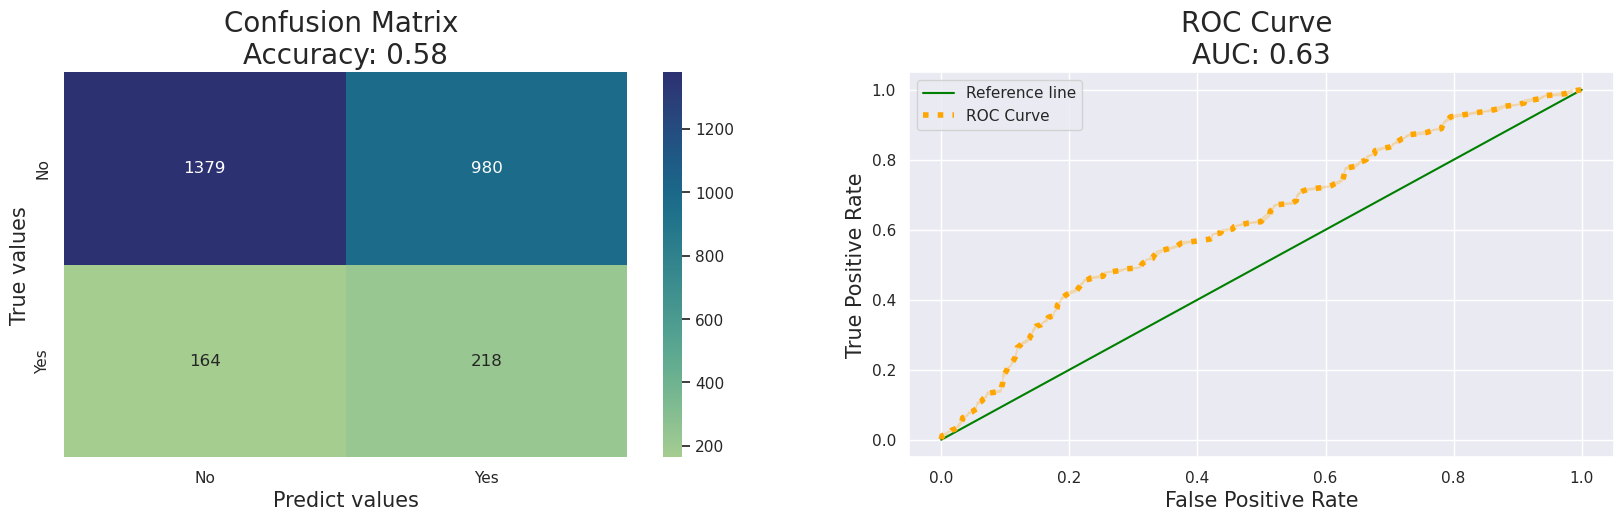

In [16]:
y_test_pred = svmC_pipe_new.predict(x_test)
y_test_proba = svmC_pipe_new.predict_proba(x_test)

print(f'Accuracy on train set: {svmC_pipe_new.score(x_train, y_train)}')
print(f'Accuracy on test  set: {svmC_pipe_new.score(x_test, y_test)}')
print()

labels = ['No', 'Yes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {svmC_pipe_new.score(x_test, y_test):.2f}', size=20)



#ROC and AUC are only for binary classification
#For multiclass, must be "one and the rest"

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='Yes')

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()

## Nothing improved....